In [26]:
import mlflow
import pandas as pd
import numpy as np 
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

tracking_uri = "{}:{}".format("http://localhost", 5000)
print(f"Tacking experiments will be available at {tracking_uri}")

Tacking experiments will be available at http://localhost:5000


In [27]:
mlflow.set_tracking_uri(tracking_uri)


In [28]:
#load the dataset.
X, y = datasets.load_iris(return_X_y=True, as_frame=True)
dataset_df = X.copy()
dataset_df["species"] = y

## I've got a bit distracted with EDA :)

In [158]:
display(dataset_df.groupby("species").std())
display(dataset_df.groupby("species").mean())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,0.352490,0.379064,0.173664,0.105386
1,0.516171,0.313798,0.469911,0.197753
2,0.635880,0.322497,0.551895,0.274650


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [159]:
dataset_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [160]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [161]:
dataset_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

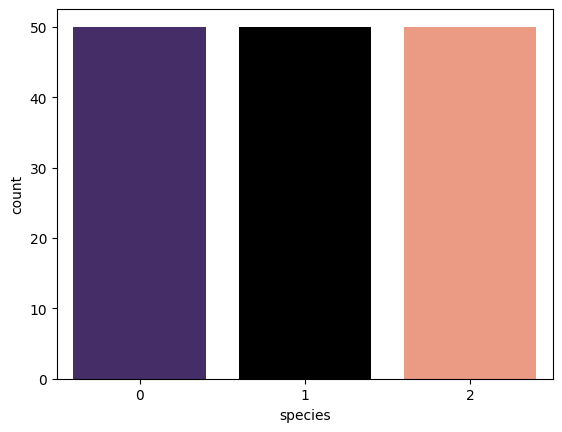

In [ ]:
sns.countplot(hue='species', x='species',data=dataset_df, palette=['#432371',"#000000", '#fc9272'], legend=False)
plt.show()

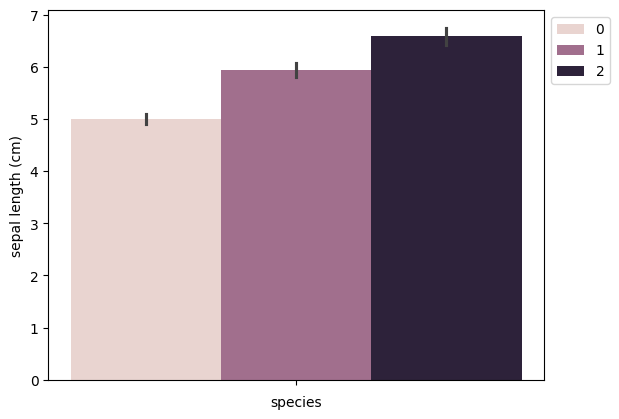

<Figure size 640x480 with 0 Axes>

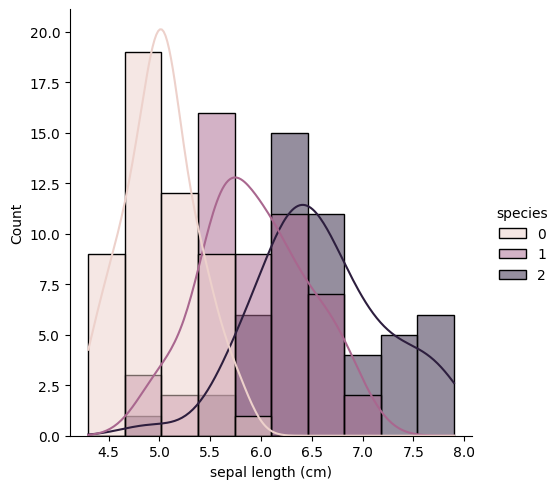

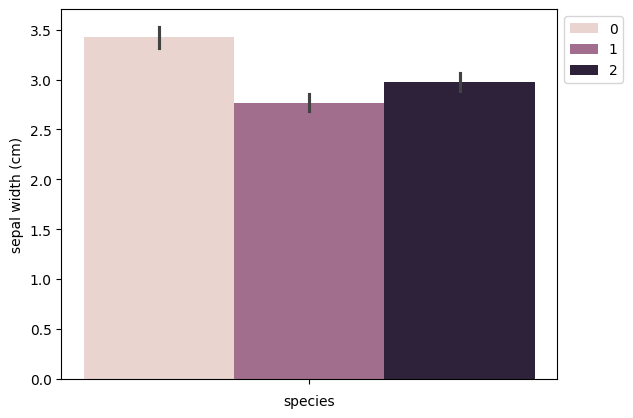

<Figure size 640x480 with 0 Axes>

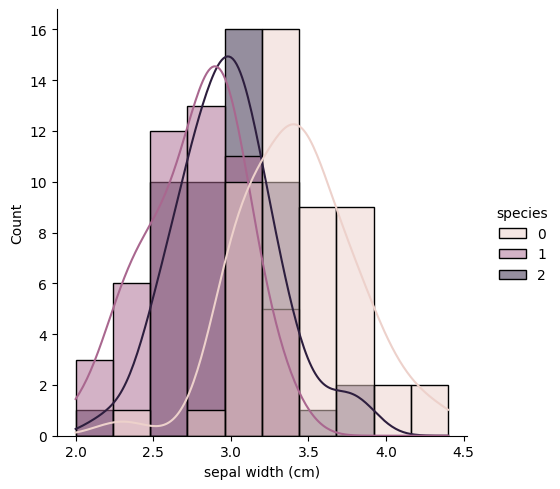

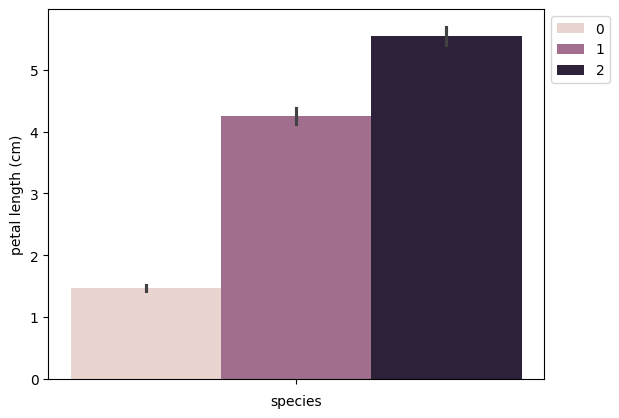

<Figure size 640x480 with 0 Axes>

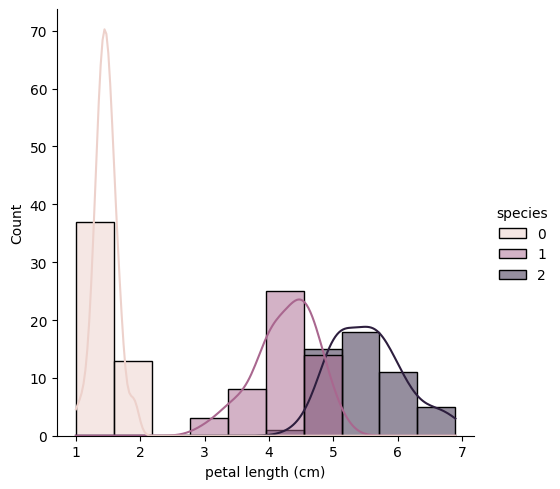

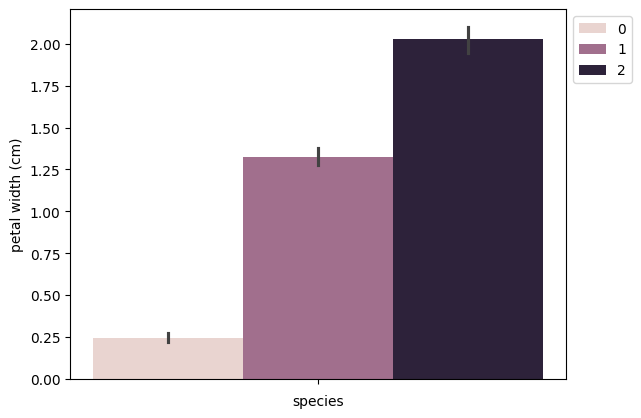

<Figure size 640x480 with 0 Axes>

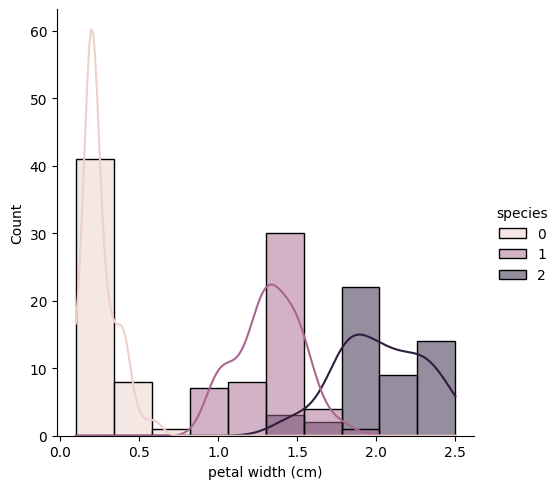

In [163]:
def bar_plot_by_feature(feature):
    plt.figure()
    sns.barplot(data=dataset_df, hue='species', y=feature)
    plt.xlabel("species")
    plt.legend(bbox_to_anchor=(1, 1), loc=2)
    plt.plot()

def plot_hist_distributions_by_feature(feature):
    plt.figure()
    sns.displot(dataset_df, x=feature, hue='species', kde=True, bins=10)
    plt.plot()
    
for feature in dataset_df.columns:
    
    if feature != 'species':
        bar_plot_by_feature(feature)
        plot_hist_distributions_by_feature(feature)

Text(0.5, 1.0, 'petals distribution')

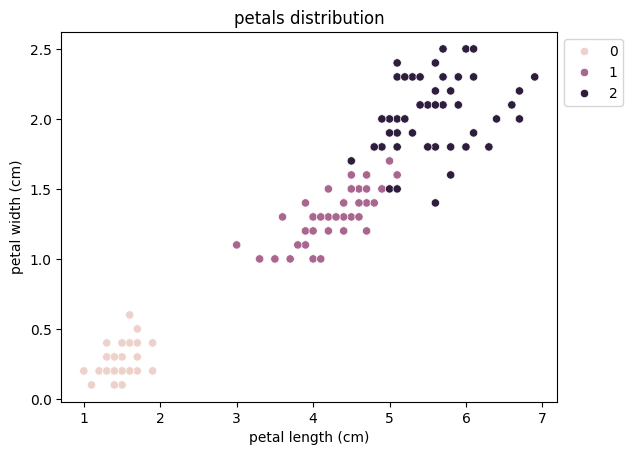

In [164]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=dataset_df, hue='species')
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("petals distribution")

Text(0.5, 1.0, 'sepal distribution')

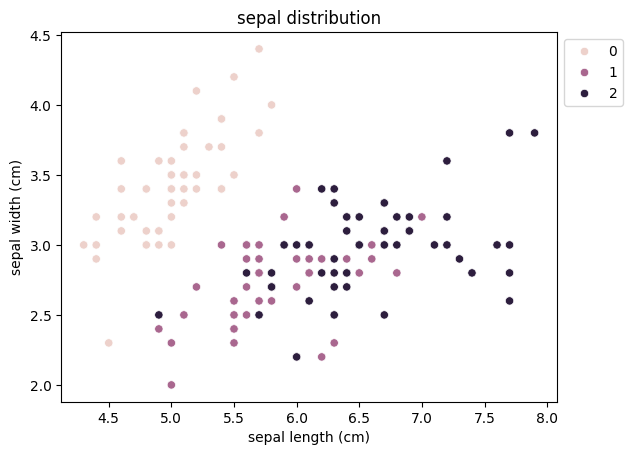

In [165]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=dataset_df, hue='species')
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("sepal distribution")

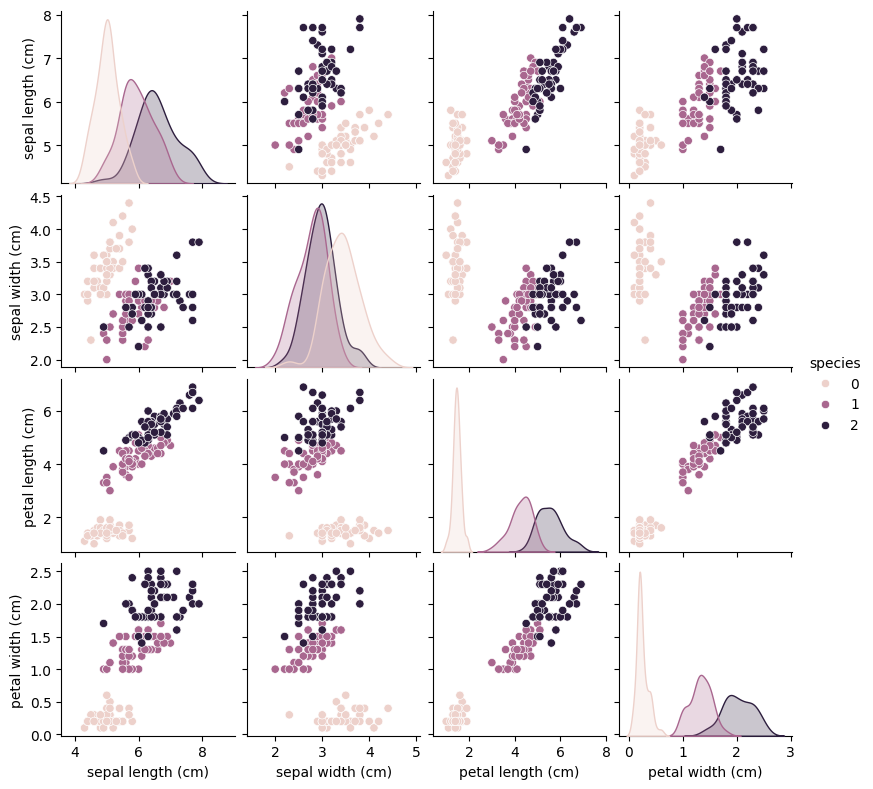

In [166]:

sns.pairplot(dataset_df, hue='species', height=2)

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

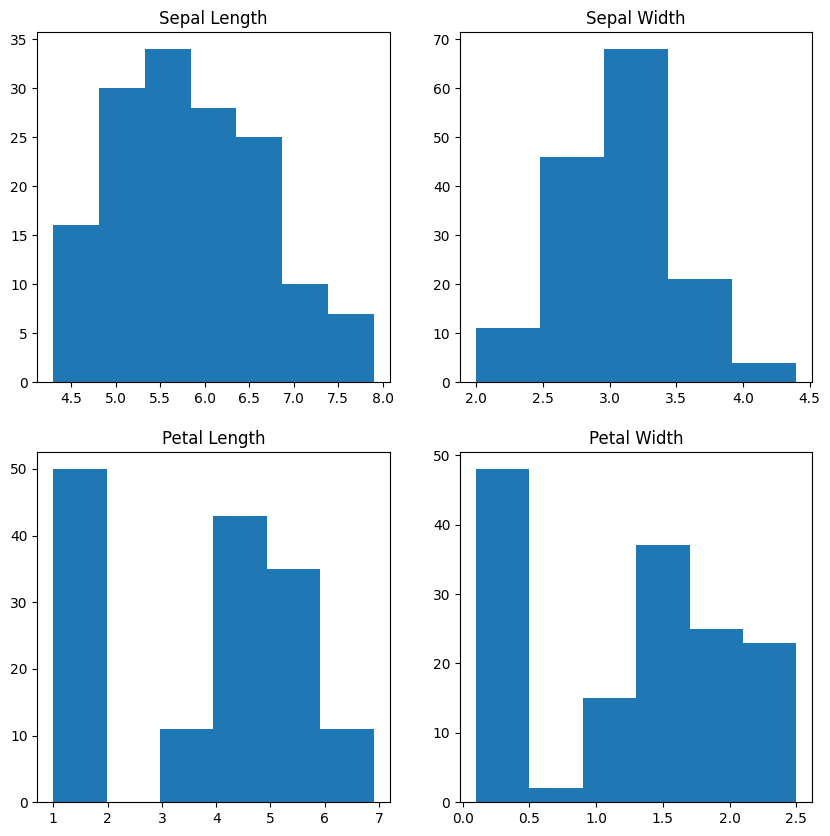

In [167]:

fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(dataset_df['sepal length (cm)'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(dataset_df['sepal width (cm)'], bins=5)

axes[1,0].set_title("Petal Length")
axes[1,0].hist(dataset_df['petal length (cm)'], bins=6)

axes[1,1].set_title("Petal Width")
axes[1,1].hist(dataset_df['petal width (cm)'], bins=6)

In [168]:
dataset_0 = dataset_df[dataset_df['species']==0]
dataset_1 = dataset_df[dataset_df['species']==1]
dataset_2 = dataset_df[dataset_df['species']==2]
x = np.array([i for i in range(len(dataset_0))])


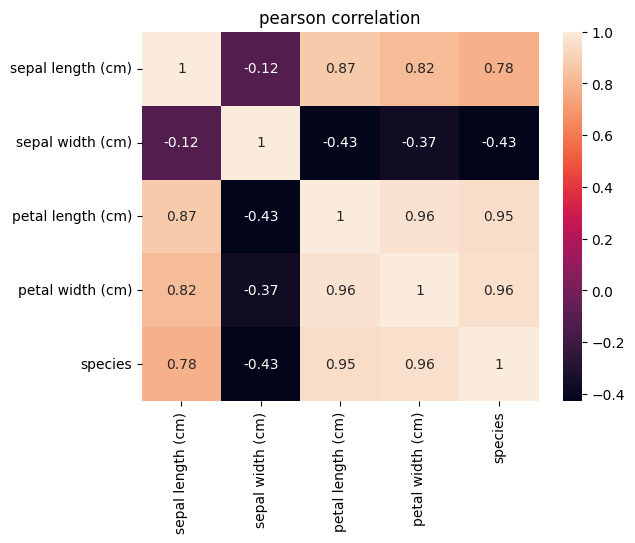

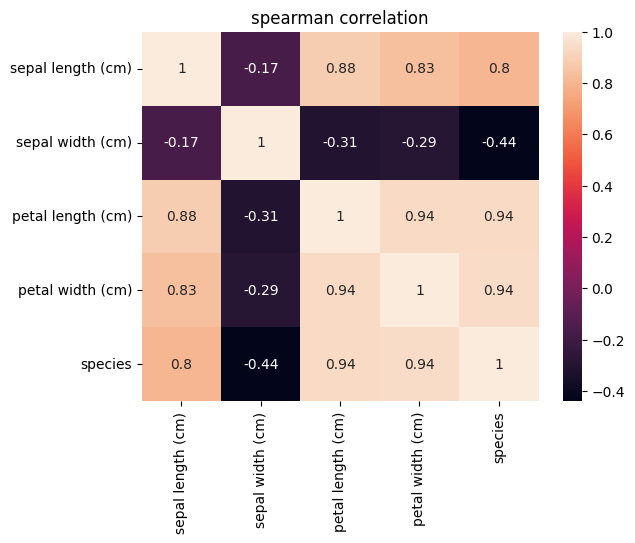

In [169]:
import seaborn as sns 
import matplotlib.pyplot as plt 


sns.heatmap(dataset_df.corr(method='pearson'), 
            annot = True); 
plt.title("pearson correlation")
plt.show()

sns.heatmap(dataset_df.corr(method='spearman'), 
            annot = True); 
plt.title("spearman correlation")
plt.show()

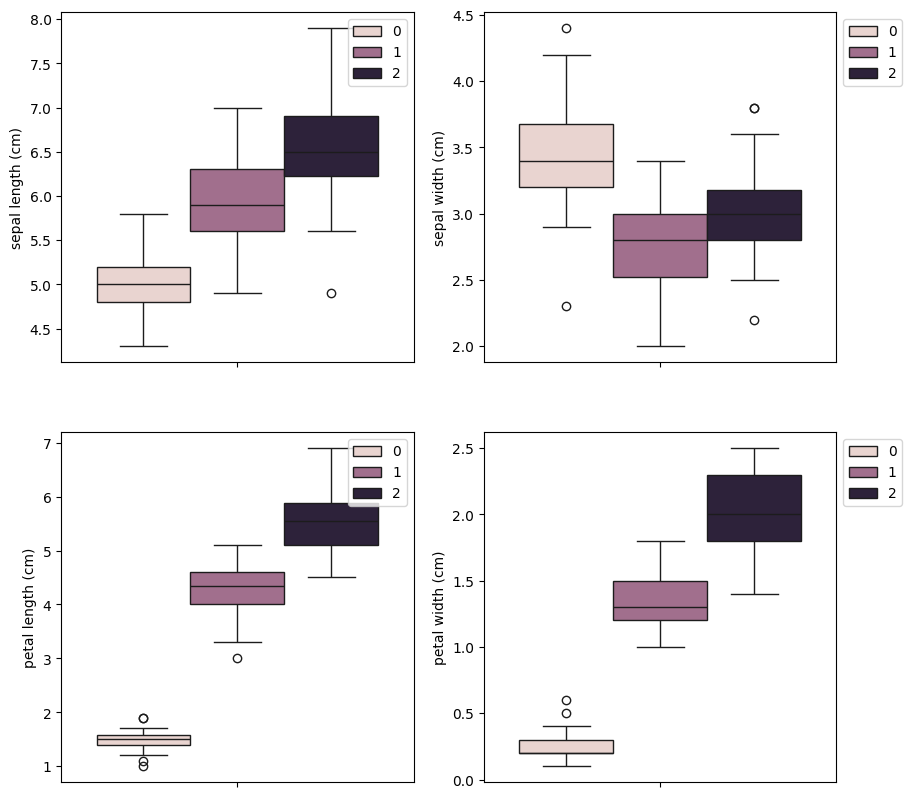

In [178]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot_by_feature(feature):
    sns.boxplot(hue="species", y=feature, data=dataset_df)

plt.figure(figsize=(10,10))
    
# Adding the subplot at the specified
# grid position
plt.subplot(221)
box_plot_by_feature('sepal length (cm)')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

plt.subplot(222)
box_plot_by_feature('sepal width (cm)')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.subplot(223)
box_plot_by_feature('petal length (cm)')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

plt.subplot(224)
box_plot_by_feature('petal width (cm)')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()